<a href="https://colab.research.google.com/github/DorcasO/Moringa_Transcriptomics/blob/main/Moringa_Seed_data_Andrea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Define path inside your Google Drive
drive_path = "/content/drive/MyDrive/Moringa_Seed data-Andrea.xlsx"

# Extract the directory path
dir_path = os.path.dirname(drive_path)

# Create the directory if it doesn't exist
os.makedirs(dir_path, exist_ok=True)

In [46]:
# Load data
df = pd.read_excel('/content/drive/MyDrive/Moringa_Seed data-Andrea.xlsx')

In [47]:
# Basic Overview
print("\n--- Head ---\n", df.head())
print("\n--- Info ---\n")
df.info()
print("\n--- Summary Stats ---\n", df.describe())



--- Head ---
   Samples  Avrg.\n Seed weight\n (mg)  Avrg.\n Oil weight\n (mg)  Avrg. Oil%
0     MO1                       258.8                       90.1        35.0
1     MO2                       333.6                      110.3        33.1
2     MO3                       232.0                       79.3        34.2
3     MO4                       232.8                       77.8        33.5
4     MO5                       271.6                       92.0        33.9

--- Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Samples                   48 non-null     object 
 1   Avrg.
 Seed weight
 (mg)  48 non-null     float64
 2   Avrg.
 Oil weight
 (mg)   48 non-null     float64
 3   Avrg. Oil%                48 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB

--- Summary Stats ---
 

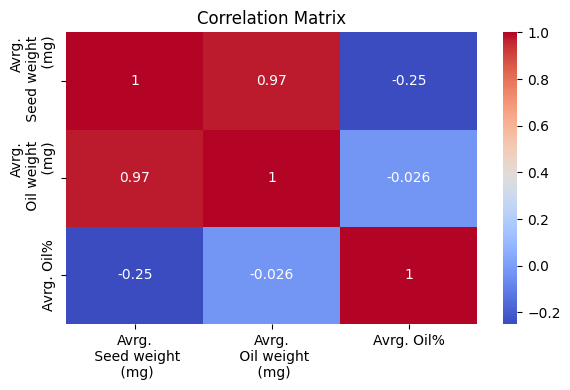

Correlation matrix saved to: /content/drive/MyDrive/correlation_matrix.png


<Figure size 640x480 with 0 Axes>

In [54]:
# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Avrg.\n Seed weight\n (mg)', 'Avrg.\n Oil weight\n (mg)', 'Avrg. Oil%']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

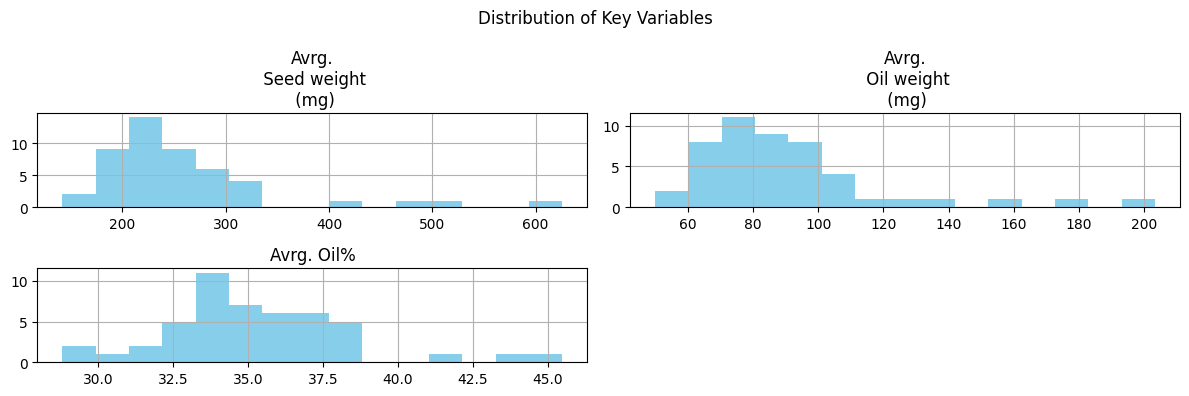

FileNotFoundError: [Errno 2] No such file or directory: '/My Drive/Plots.png'

<Figure size 640x480 with 0 Axes>

In [56]:
# Histograms
df[['Avrg.\n Seed weight\n (mg)', 'Avrg.\n Oil weight\n (mg)', 'Avrg. Oil%']].hist(bins=15, figsize=(12, 4), color='skyblue')
plt.suptitle('Distribution of Key Variables')
plt.tight_layout()

# Define the directory and filename to save the plot in Google Drive
output_dir = "/content/drive/MyDrive/Plots"
output_filename = "histograms.png"
output_path = os.path.join(output_dir, output_filename)

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the plot as a PNG file
plt.savefig(output_path)
print(f"Histograms saved to: {output_path}")

plt.show()

In [64]:
save_path = "/content/drive/MyDrive/Plots"
output_filemname = "Histogram.png"
output_path = os.path.join(save_path, output_filemname)
os.makedirs(save_path, exist_ok=True)
plt.savefig(output_path)
print(f"Histogram saved to: {output_path}")


Histogram saved to: /content/drive/MyDrive/Plots/Histogram.png


<Figure size 640x480 with 0 Axes>

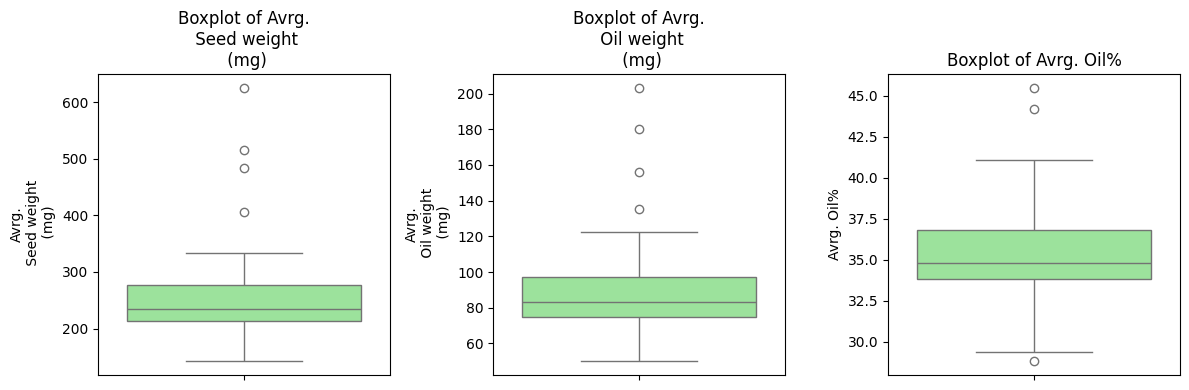

In [59]:
# Boxplots
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Avrg.\n Seed weight\n (mg)', 'Avrg.\n Oil weight\n (mg)', 'Avrg. Oil%']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [60]:
save_path = "/content/drive/MyDrive/Plots"
output_filemname = "boxplots.png"
output_path = os.path.join(save_path, output_filemname)
os.makedirs(save_path, exist_ok=True)
plt.savefig(output_path)
print(f"Boxplots saved to: {output_path}")


Boxplots saved to: /content/drive/MyDrive/Plots/boxplots.png


<Figure size 640x480 with 0 Axes>

Scatterplots saved to: /content/drive/MyDrive/Plots/scatterplots.png


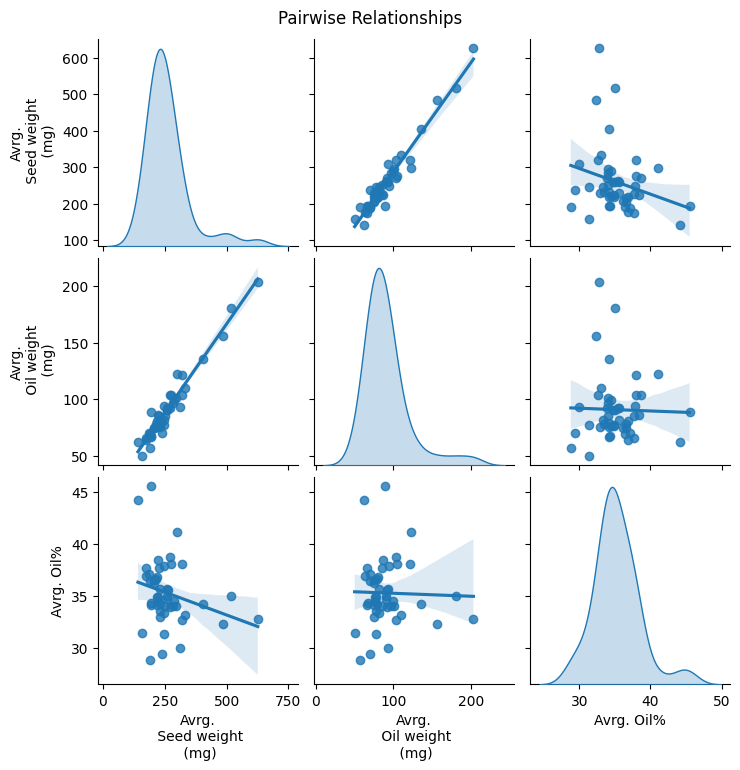

In [63]:
# Scatter Plots
sns.pairplot(df[['Avrg.\n Seed weight\n (mg)', 'Avrg.\n Oil weight\n (mg)', 'Avrg. Oil%']], kind='reg', diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)

# Define the directory and filename to save the plot in Google Drive
output_dir = "/content/drive/MyDrive/Plots"
output_filename = "scatterplots.png"
output_path = os.path.join(output_dir, output_filename)

# Create the output directory if it doesn't exist (this might be redundant if done before, but good to ensure)
os.makedirs(output_dir, exist_ok=True)

# Save the plot as a PNG file
plt.savefig(output_path)
print(f"Scatterplots saved to: {output_path}")

plt.show()

In [ ]:
# Group by Location (if geographical data exists)
if 'Location' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Location', y='AvgOilYieldPercent')
    plt.xticks(rotation=90)
    plt.title('Oil Yield % by Geographical Location')
    plt.tight_layout()
    plt.show()

    # Grouped Mean Comparison
    grouped = df.groupby('Location')[['AvgSeedWeight', 'AvgOilWeight', 'AvgOilYieldPercent']].mean().sort_values('AvgOilYieldPercent', ascending=False)
    print("\n--- Mean Values by Location ---\n", grouped)

# Optional: PCA or Clustering for Sample Grouping
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['AvgSeedWeight', 'AvgOilWeight', 'AvgOilYieldPercent']
X_scaled = StandardScaler().fit_transform(df[features])
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Location'] = df['Location']

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Location', palette='tab20')
plt.title('PCA of Seed Samples')
plt.tight_layout()
plt.show()


In [65]:
# Load data
df = pd.read_excel('/content/drive/MyDrive/Moringa_Seed data-Andrea.xlsx')

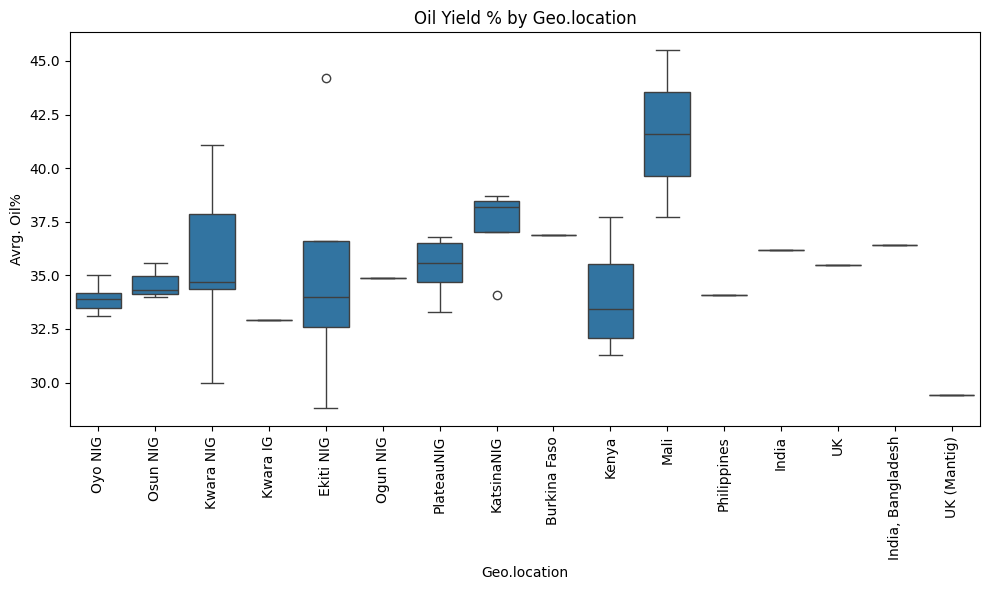

In [72]:
# Group by Location (if geographical data exists)
if 'Geo.location' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Geo.location', y='Avrg. Oil%')
    plt.xticks(rotation=90)
    plt.title('Oil Yield % by Geo.location')
    plt.tight_layout()
    plt.show()

In [73]:
# Save the plot as a PNG file
plt.savefig(output_path)
print(f"Location saved to: {output_path}")

plt.show()

Location saved to: /content/drive/MyDrive/Plots/Histogram.png


<Figure size 640x480 with 0 Axes>

In [75]:
# Grouped Mean Comparison
grouped = df.groupby('Geo.location')[['Avrg.\n Seed weight\n (mg)', 'Avrg.\n Oil weight\n (mg)', 'Avrg. Oil%']].mean().sort_values('Avrg. Oil%', ascending=False)
print("\n--- Mean Values by Geo.location ---\n", grouped)


--- Mean Values by Geo.location ---
                    Avrg.\n Seed weight\n (mg)  Avrg.\n Oil weight\n (mg)  \
Geo.location                                                               
Mali                               209.950000                  87.000000   
KatsinaNIG                         251.700000                  94.425000   
Burkina Faso                       176.100000                  63.600000   
India, Bangladesh                  190.500000                  69.200000   
India                              207.300000                  74.600000   
Kwara NIG                          264.425000                  94.075000   
UK                                 263.300000                  92.200000   
PlateauNIG                         237.580000                  83.860000   
Ekiti NIG                          232.300000                  80.420000   
Ogun NIG                           217.900000                  76.100000   
Osun NIG                           236.166667     

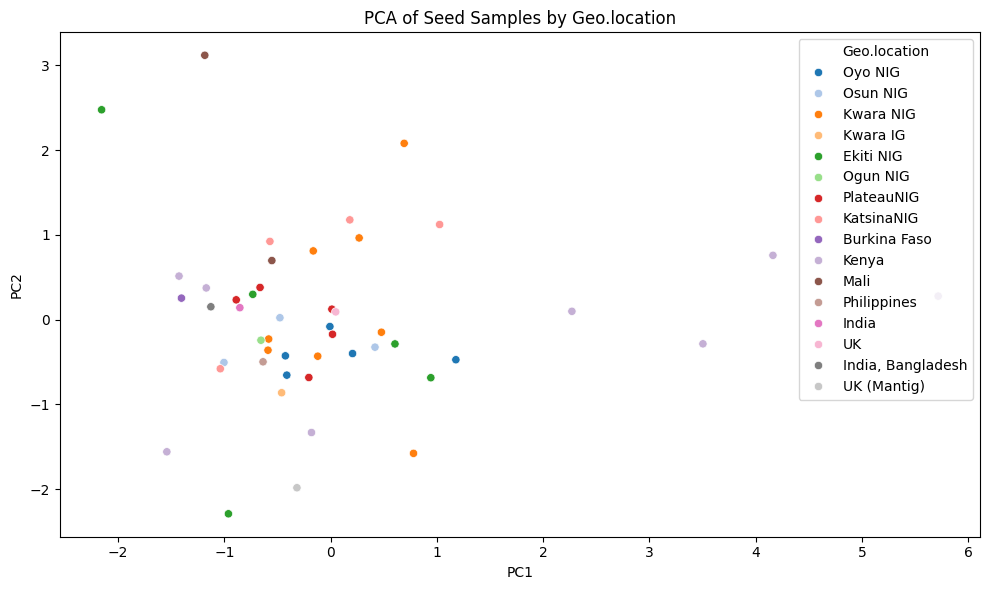

In [77]:
# Optional: PCA or Clustering for Sample Grouping
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Identify the correct column names for the average values and location
avg_seed_weight_col = 'Avrg.\n Seed weight\n (mg)'
avg_oil_weight_col = 'Avrg.\n Oil weight\n (mg)'
avg_oil_yield_percent_col = 'Avrg. Oil%'
location_col = 'Geo.location'

features = [avg_seed_weight_col, avg_oil_weight_col, avg_oil_yield_percent_col]

# Check if the location column exists and has more than one unique value for grouping
if location_col in df.columns and df[location_col].nunique() > 1:
    # Drop rows with NaN in the features before scaling and PCA
    df_cleaned = df.dropna(subset=features).copy()

    if not df_cleaned.empty:
        X_scaled = StandardScaler().fit_transform(df_cleaned[features])
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(X_scaled)

        df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        df_pca[location_col] = df_cleaned[location_col].reset_index(drop=True) # Align the location column with the cleaned data

        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=location_col, palette='tab20')
        plt.title(f'PCA of Seed Samples by {location_col}')
        plt.tight_layout()
        plt.show()
    else:
        print("\n--- Not enough data after dropping NaNs for PCA ---\n")
else:
    print(f"\n--- Column '{location_col}' not suitable for grouping or does not exist for PCA analysis ---\n")

## Summary:

### Data Analysis Key Findings

* The initial attempt to load the data resulted in incorrect column headers, requiring manual identification of the correct header rows (rows 0 and 1 of the original Excel).
* Combining information from the first two rows of the original Excel file was necessary to create meaningful column names.
* After header correction, the column names for numerical data were found to be different from the initially assumed names, requiring inspection of `df.columns`.
* Converting relevant columns to a numeric data type was essential for plotting and analysis, with `errors='coerce'` used to handle non-numeric values.
* A duplicate column named 'MO1' was present in the DataFrame, causing errors in grouping operations.
* Dropping the duplicate 'MO1' column resolved the error and allowed the grouped analysis and PCA plot to proceed.

### Insights or Next Steps

* Always inspect the DataFrame's head and column names after loading data, especially from sources like Excel, to verify the header and data structure.
* Implement robust error handling and column name validation in data processing pipelines to prevent issues caused by unexpected column names or duplicates.